**Gerekli Kütüphanelerin eklenmesi**

In [ ]:
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
from PIL import Image
import pandas as pd
import cv2
import shutil
import librosa
from tqdm import tqdm
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten,Lambda
from tensorflow.python.keras.callbacks import ModelCheckpoint
from datetime import datetime
import torchvision.transforms as transforms
from os import listdir
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

**Google Drive için gerekli bağlantıların kurulması**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Verinin Train(Eğitim) Edilmesi**

In [ ]:
air_conditioner = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/air_conditioner/*png*')
car_horn = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/car_horn/*png*')
children_playing = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/children_playing/*png*')
dog_bark = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/dog_bark/*png*')
drilling = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/drilling/*png*')
engine_idling = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/engine_idling/*png*')
gun_shot= glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/gun_shot/*png*')
jackhammer = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/jackhammer/*png*')
siren = glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/siren/*png*')
street_music= glob.glob('/content/drive/MyDrive/UrbanSound8K/final_spectograms/street_music/*png*')




data = []
labels = []
cntr = 0
for i in air_conditioner:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in car_horn:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in children_playing:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in dog_bark:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in drilling:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(4)
for i in engine_idling:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(5)
for i in gun_shot:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(6)
for i in jackhammer:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(7)    
for i in siren:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(8)
for i in street_music:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb')
    print(cntr)
    cntr += 1    
    image=np.array(image)
    data.append(image)
    labels.append(9)    



Görüntülenen çıkış son 5000 satıra kısaltıldı.
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
392

In [ ]:
print(f"data: {len(data)} labels: {len(labels)}")

data: 8732 labels: 8732


In [ ]:
print(labels[1234])


1


In [ ]:
print(data[1234])

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 63  63  63]
  [ 63  63  63]
  [ 62  62  62]
  ...
  [110 110 110]
  [110 110 110]
  [110 110 110]]

 [[ 64  64  64]
  [ 64  64  64]
  [ 63  63  63]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[ 64  64  64]
  [ 64  64  64]
  [ 63  63  63]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]]


In [ ]:
temp_data = data
temp_labels = labels

print(len(temp_data), len(temp_labels))

8732 8732


In [ ]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [ ]:
print(f"x_test {len(X_test)}")
print(f"x_train {len(X_train)}")
print(f"y_test {len(y_test)}")
print(f"y_train {len(y_train)}")

x_test 1747
x_train 6985
y_test 1747
y_train 6985


In [ ]:
print(X_test[1234])

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [138 138 138]
  [134 134 134]
  [118 118 118]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [138 138 138]
  [134 134 134]
  [121 121 121]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [138 138 138]
  [134 134 134]
  [121 121 121]]]


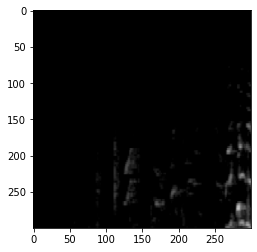

(300, 300, 3)


In [ ]:
plt.imshow(X_test[1234])
plt.show()

print(X_test[1234].shape)

In [ ]:
X_val = X_test[:874]
y_val = y_test[:874]

X_test = X_test[874:]
y_test = y_test[874:]

In [ ]:
print(f"X_test {len(X_test)}")
print(f"X_train {len(X_train)}")
print(f"X_val {len(X_val)}")

X_test 873
X_train 6985
X_val 874


**CNN modeli hazırlanması**

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(300,300,3)))      
model.add(tf.keras.layers.MaxPool2D((2,2)))                          

In [ ]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(300,300,3)))      
model.add(tf.keras.layers.MaxPool2D((2,2)))  
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(300,300,3))) 
model.add(tf.keras.layers.MaxPool2D((2,2)))   
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(300,300,3)))      
model.add(tf.keras.layers.MaxPool2D((2,2)))  
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(300,300,3)))  

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',       
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(X_train, y_train,
                       steps_per_epoch=64,
                      epochs= 128,  
                      validation_data= (X_val, y_val))


Epoch 1/128
64/64 [==============================] - 33s 328ms/step - loss: 2.7579 - accuracy: 0.1187 - val_loss: 2.2748 - val_accuracy: 0.1705
Epoch 2/128
64/64 [==============================] - 18s 284ms/step - loss: 2.2612 - accuracy: 0.1404 - val_loss: 2.2160 - val_accuracy: 0.2002
Epoch 3/128
64/64 [==============================] - 18s 285ms/step - loss: 2.2043 - accuracy: 0.1591 - val_loss: 2.1541 - val_accuracy: 0.1911
Epoch 4/128
64/64 [==============================] - 18s 288ms/step - loss: 2.1904 - accuracy: 0.1621 - val_loss: 2.1779 - val_accuracy: 0.1716
Epoch 5/128
64/64 [==============================] - 19s 290ms/step - loss: 2.1745 - accuracy: 0.1608 - val_loss: 2.0931 - val_accuracy: 0.1968
Epoch 6/128
64/64 [==============================] - 19s 290ms/step - loss: 2.1374 - accuracy: 0.1795 - val_loss: 2.0678 - val_accuracy: 0.1991
Epoch 7/128
64/64 [==============================] - 18s 289ms/step - loss: 2.1157 - accuracy: 0.1911 - val_loss: 2.0585 - val_accuracy:

**Loss ve Accuracy Sonuclarının gosterilmesi**

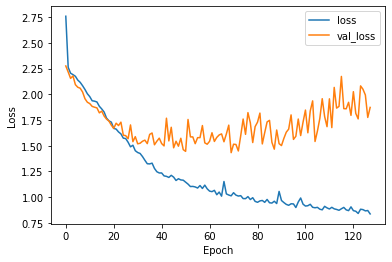

In [ ]:
plt.plot(model_fit.history["loss"], label="loss")
plt.plot(model_fit.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

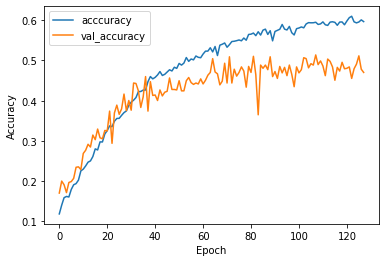

In [ ]:
plt.plot(model_fit.history["accuracy"], label="acccuracy")
plt.plot(model_fit.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()